# **Detecting Credit Card Default Risk With Machine Learning**

In this Project, we are going to create a model to determine whether a bank customer's transaction is at a risk of default given the customers information such as job, salary, family member. For the dataset, I found a great resource from Kaggle, https://www.kaggle.com/mishra5001/credit-card?select=application_data.csv, where the creator complied data from International Institute of Information Technology Bangalore to provide more insights into the transactions of credit card defaultees.

---




**Libraries Needed for this Project:**

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)




---



# **PART I: EDA**

# Loading the Data




In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [69]:
data = pd.read_csv("/content/gdrive/MyDrive/ITP 449 Project/application_data.csv",index_col="SK_ID_CURR")

In [ ]:
data.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,N

Here we can take a rough look at our data, but for better understanding, we need to know the meaning for each attributes.

In [ ]:
description = pd.read_csv("/content/gdrive/MyDrive/ITP 449 Project/columns_description.csv",index_col="No",encoding = "ISO-8859-1")

In [ ]:
description = description[description["Table"] == "application_data"]
description[["Row","Description"]]

,Row,Description
No,,
1,SK_ID_CURR,ID of loan in our sample
2,TARGET,Target variable (1 - client with payment diffi...
5,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
6,CODE_GENDER,Gender of the client
7,FLAG_OWN_CAR,Flag if the client owns a car
8,FLAG_OWN_REALTY,Flag if client owns a house or flat
9,CNT_CHILDREN,Number of children the client has
10,AMT_INCOME_TOTAL,Income of the client
11,AMT_CREDIT,Credit amount of the loan


Here we can see the description for each attribute. Judging from the descriptions, we can conclude that **"TARGET"** is our target varibale, since it classifies customers into two categories:

**1.   Customers that may have difficulties paying their loans and at risk of default.**

**0.   Customers that do not have difficulties in paying their loans.**

Which is exactly what we are trying to explore in this project.



# EDA

First, I will get a basic understanding of the dataset

In [70]:
data.shape

(307511, 121)

In [5]:
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,N

We are going to first address the missing values, I wrote a function that calculate the % of missing values in each column.

In [6]:
def missing(df):
    total = df.isnull().sum()
    percent = (df.isnull().sum()/df.isnull().count()*100)
    unique = df.nunique()
    datatypes = df.dtypes
    return pd.concat([total, percent, unique, datatypes], 
                     axis=1, 
                     keys=['Total', 'Missing_Percent', 'Unique', 'Data_Type']).sort_values(by="Missing_Percent", ascending=False)

In [7]:
missing(data)

,Total,Missing_Percent,Unique,Data_Type
COMMONAREA_AVG,214865,69.872297,3181,float64
COMMONAREA_MODE,214865,69.872297,3128,float64
COMMONAREA_MEDI,214865,69.872297,3202,float64
NONLIVINGAPARTMENTS_AVG,213514,69.432963,386,float64
NONLIVINGAPARTMENTS_MODE,213514,69.432963,167,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.432963,214,float64
FONDKAPREMONT_MODE,210295,68.386172,4,object
LIVINGAPARTMENTS_MEDI,210199,68.354953,1097,float64
LIVINGAPARTMENTS_AVG,210199,68.354953,1868,float64
LIVINGAPARTMENTS_MODE,210199,68.354953,736,float64


Judging from the result above, we can make an assumption that if a column has over 60% missing values, it can be regarded as non-essential information (otherwise the banks will most definitely collect them). Implementation speaking, if a row is consist of predominantly null values, it would be very hard to fill up with either interpolation or imputation and the result would not be accurate enough for the model's performance. As a result, we will exclude them from further considerations.

In [8]:
keep = list(missing(data)[missing(data)["Missing_Percent"]<0.6].index)
data = data[keep]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 64 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_TYPE_SUITE              306219 non-null  object 
 1   DEF_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 2   OBS_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 3   OBS_30_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 4   DEF_60_CNT_SOCIAL_CIRCLE     306490 non-null  float64
 5   EXT_SOURCE_2                 306851 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   AMT_ANNUITY                  307499 non-null  float64
 8   CNT_FAM_MEMBERS              307509 non-null  float64
 9   DAYS_LAST_PHONE_CHANGE       307510 non-null  float64
 10  AMT_INCOME_TOTAL             307511 non-null  float64
 11  FLAG_DOCUMENT_8              307511 non-null  int64  
 12  CODE_GENDER                  307511 non-null  object 

Here we can see that the data can be split into three parts based on data types: Object, Int, and Float. After inspections, we can conclude that the columns with object data are mostly categorical, as a result, we would need to encode them into numeric values using dummy variables in order to better fit them into our models.

# Handling Objects

In [10]:
data.describe(include=['O'])

,NAME_TYPE_SUITE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE
count,306219,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
unique,7,3,2,2,58,8,2,7,6,6,5
top,Unaccompanied,F,N,Y,Business Entity Type 3,Working,Cash loans,TUESDAY,House / apartment,Married,Secondary / secondary special
freq,248526,202448,202924,213312,67992,158774,278232,53901,272868,196432,218391


In [11]:
missing(data.select_dtypes("object"))

,Total,Missing_Percent,Unique,Data_Type
NAME_TYPE_SUITE,1292,0.420148,7,object
CODE_GENDER,0,0.000000,3,object
FLAG_OWN_CAR,0,0.000000,2,object
FLAG_OWN_REALTY,0,0.000000,2,object
ORGANIZATION_TYPE,0,0.000000,58,object
NAME_INCOME_TYPE,0,0.000000,8,object
NAME_CONTRACT_TYPE,0,0.000000,2,object
WEEKDAY_APPR_PROCESS_START,0,0.000000,7,object
NAME_HOUSING_TYPE,0,0.000000,6,object
NAME_FAMILY_STATUS,0,0.000000,6,object


We can see that NAME_TYPE_SUITE is missing 42% of its values, we will use df.mode() to fill up the null with the most common values.

In [12]:
data["NAME_TYPE_SUITE"] = data["NAME_TYPE_SUITE"].fillna(data["NAME_TYPE_SUITE"].mode()[0])

In [13]:
missing(data.select_dtypes("object"))

,Total,Missing_Percent,Unique,Data_Type
NAME_TYPE_SUITE,0,0.0,7,object
CODE_GENDER,0,0.0,3,object
FLAG_OWN_CAR,0,0.0,2,object
FLAG_OWN_REALTY,0,0.0,2,object
ORGANIZATION_TYPE,0,0.0,58,object
NAME_INCOME_TYPE,0,0.0,8,object
NAME_CONTRACT_TYPE,0,0.0,2,object
WEEKDAY_APPR_PROCESS_START,0,0.0,7,object
NAME_HOUSING_TYPE,0,0.0,6,object
NAME_FAMILY_STATUS,0,0.0,6,object


In [14]:
categorical = pd.get_dummies(data.select_dtypes("object"))
categorical

,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
100003,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
100004,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0

# Handling Integer

In [15]:
missing(data.select_dtypes("int64"))

,Total,Missing_Percent,Unique,Data_Type
FLAG_DOCUMENT_8,0,0.0,2,int64
FLAG_DOCUMENT_2,0,0.0,2,int64
REG_CITY_NOT_WORK_CITY,0,0.0,2,int64
REG_CITY_NOT_LIVE_CITY,0,0.0,2,int64
LIVE_REGION_NOT_WORK_REGION,0,0.0,2,int64
REG_REGION_NOT_WORK_REGION,0,0.0,2,int64
REG_REGION_NOT_LIVE_REGION,0,0.0,2,int64
HOUR_APPR_PROCESS_START,0,0.0,24,int64
REGION_RATING_CLIENT_W_CITY,0,0.0,3,int64
REGION_RATING_CLIENT,0,0.0,3,int64


None of the int64 dtypes columns have any missing values, which is great. Now we just need to take a look at the distribution of these variables.

In [16]:
data.select_dtypes("int64").describe()

,FLAG_DOCUMENT_8,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,CNT_CHILDREN,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH,TARGET
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.081376,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.003896,0.000335,0.000023,0.003912,0.417052,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000007,0.179555,0.230454,0.078173,0.040659,0.050769,0.015144,12.063419,2.031521,2.052463,0.056720,0.281066,0.998133,0.199368,0.819889,0.999997,-2994.202373,63815.045904,-16036.995067,0.080729
std,0.273412,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.062295,0.018299,0.004771,0.062424,0.722121,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.002550,0.383817,0.421124,0.268444,0.197499,0.219526,0.122126,3.265832,0.502737,0.509034,0.231307,0.449521,0.043164,0.399526,0.384280,0.001803,1509.450419,141275.766519,4363.988632,0.272419
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7197.000000,-17912.000000,-25229.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,-4299.000000,-2760.000000,-19682.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,-3254.000000,-1213.000000,-15750.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-1720.000000,-289.000000,-12413.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,365243.000000,-7489.000000,1.000000


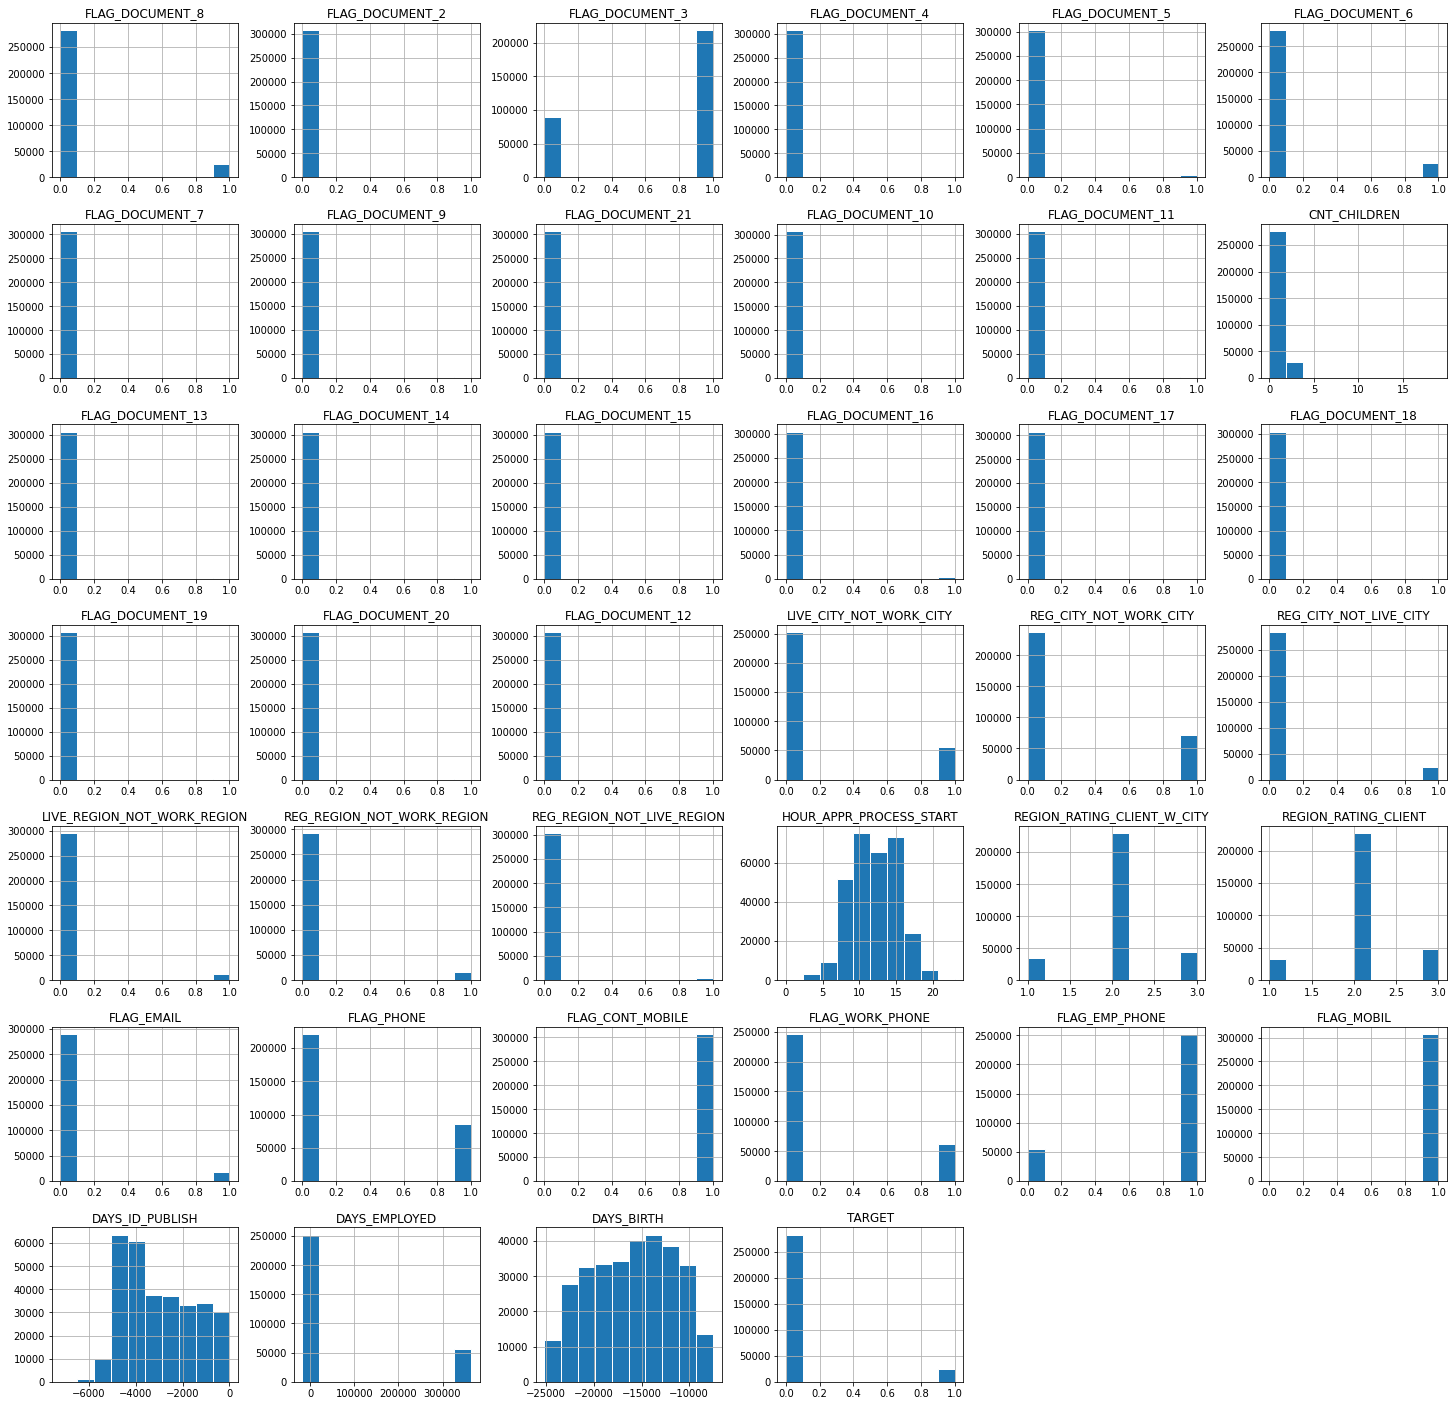

In [17]:
data.select_dtypes("int64").hist(figsize=(25,25), ec='w')
plt.show()

In [18]:
integer = data.select_dtypes("int64")

# Handling Float

In [19]:
missing(data.select_dtypes("float64"))

,Total,Missing_Percent,Unique,Data_Type
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021,10,float64
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021,9,float64
EXT_SOURCE_2,660,0.214626,119831,float64
AMT_GOODS_PRICE,278,0.090403,1002,float64
AMT_ANNUITY,12,0.003902,13672,float64
CNT_FAM_MEMBERS,2,0.000650,17,float64
DAYS_LAST_PHONE_CHANGE,1,0.000325,3773,float64
AMT_INCOME_TOTAL,0,0.000000,2548,float64


In [20]:
# Filling the missing values
floatVal = data.select_dtypes("float64").interpolate(method ='linear', limit_direction ='forward')

In [21]:
missing(floatVal)

,Total,Missing_Percent,Unique,Data_Type
DEF_30_CNT_SOCIAL_CIRCLE,0,0.0,13,float64
OBS_60_CNT_SOCIAL_CIRCLE,0,0.0,46,float64
OBS_30_CNT_SOCIAL_CIRCLE,0,0.0,46,float64
DEF_60_CNT_SOCIAL_CIRCLE,0,0.0,12,float64
EXT_SOURCE_2,0,0.0,120491,float64
AMT_GOODS_PRICE,0,0.0,1080,float64
AMT_ANNUITY,0,0.0,13677,float64
CNT_FAM_MEMBERS,0,0.0,18,float64
DAYS_LAST_PHONE_CHANGE,0,0.0,3773,float64
AMT_INCOME_TOTAL,0,0.0,2548,float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a0b733e90>,
      dtype=object)

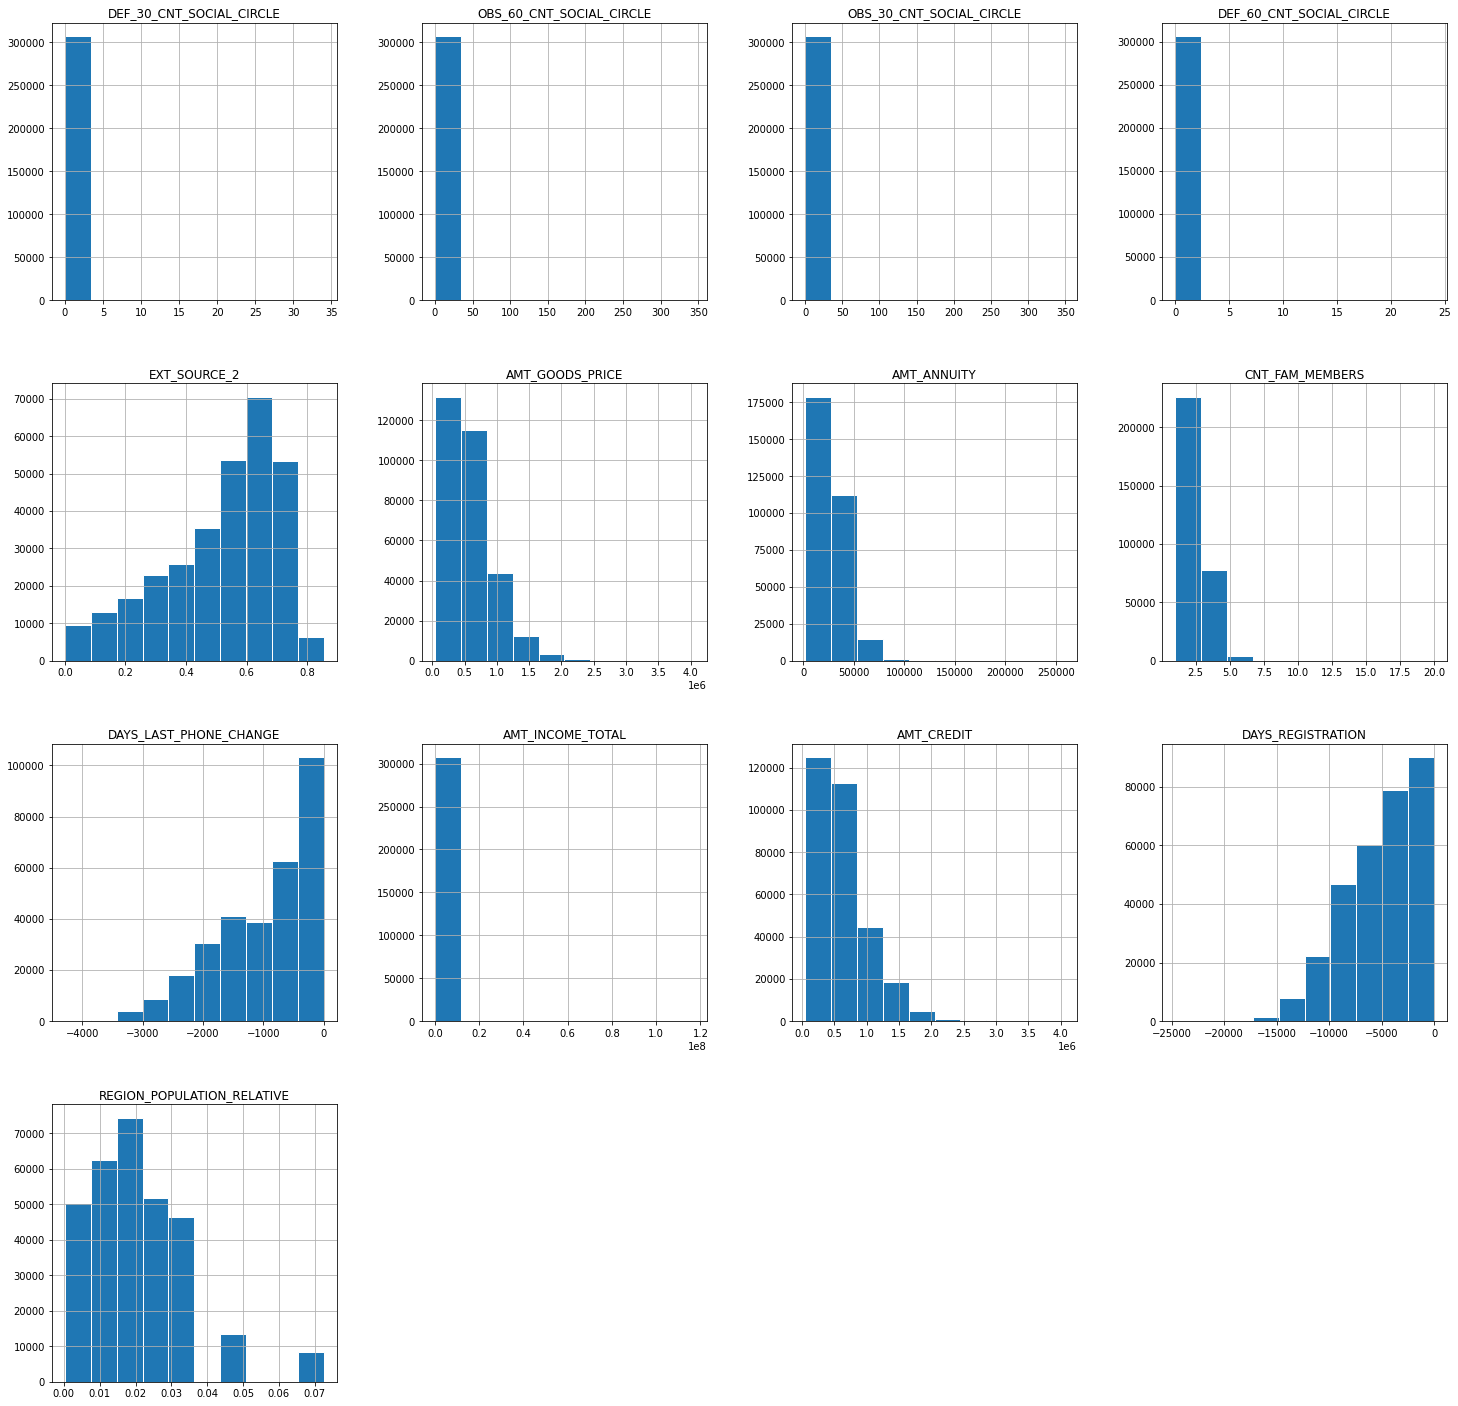

In [22]:
floatVal.hist(figsize=(25,25), ec='w')

# Putting things together

Now we have successfully processed all three data types, its now time to merge them together into a new dataframe, and check for any interesting correlations between our data.

In [26]:
data = pd.concat([categorical,integer,floatVal],axis=1)
data.describe()

,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,...,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,FLAG_DOCUMENT_8,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,CNT_CHILDREN,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_12,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMAIL,FLAG_PHONE,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH,TARGET,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE
count,307511.000000,307511.000000,307511.000000,307511.000000,307511

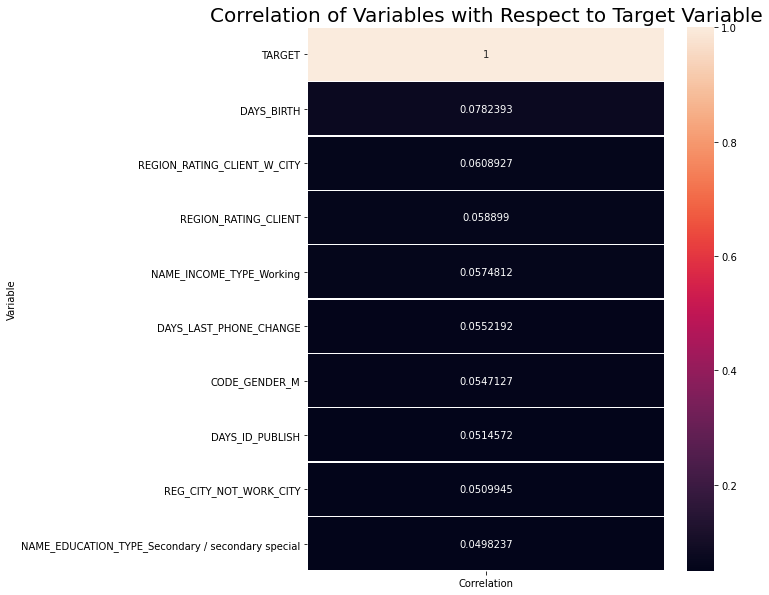

In [27]:
# Taking a look at the correlation with respect to Target variable
corr = data.corrwith(data["TARGET"]).reset_index()
corr.columns = ["Variable","Correlation"]
corr = corr.set_index("Variable")
corr = corr.sort_values(by=["Correlation"], ascending = False).head(10)

plt.figure(figsize=(8, 10))
fig = sns.heatmap(corr, annot=True, fmt="g",linecolor="w",linewidth=0.5)

plt.title("Correlation of Variables with Respect to Target Variable", fontsize=20)
plt.show()

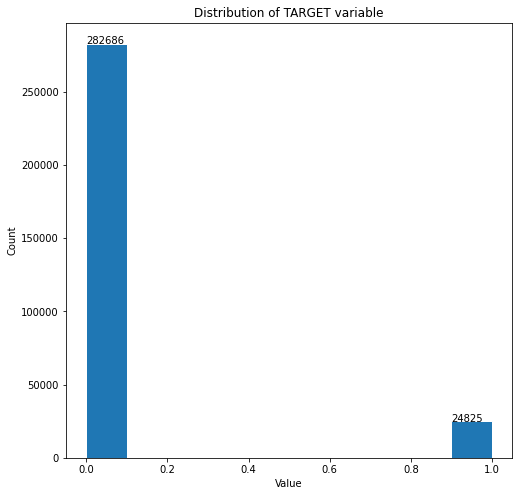

In [28]:
plt.figure(figsize=(8,8))
counts, _, patches = plt.hist(data["TARGET"],edgecolor="w")
for count, patch in zip(counts,patches):
    if count > 0:
      plt.annotate(str(int(count)), xy=(patch.get_x(), patch.get_height()))
plt.title("Distribution of TARGET variable")
plt.ylabel("Count")
plt.xlabel("Value")
plt.show()

We can see from here that there is a huge disparity between those who are marked as customers who will have trouble repaying the loan and those who do not. This makes sense since most customers should be able to get their loans without trouble. However, the gap is very likely to affect the performance of our simpler models such as LogReg, and we will try to address that in the next part.

---



# **PART II: MACHINE LEARNING**

First, we split the data into training and testing data, with a testing portion of 30% and random state of 2020

In [31]:
X = data.drop(['TARGET'],axis = 1)
y = data['TARGET']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.3, random_state = 2020, stratify=y) #since our data is a bit imbalanced

In [ ]:
print(sum(Y_train_over)/Y_train_over.shape[0])
print(sum(Y_test)/Y_test.shape[0])

0.5
0.08073362672621241


# Testing Simple Models

In [36]:
# We are going to write a general function that tests multiple models on our data all at once

def model_lot(X_train, X_test, Y_train, Y_test):
  collection = [DummyClassifier(),LogisticRegression(),DecisionTreeClassifier(),GaussianNB()]
  comparison = pd.DataFrame([])
  row_index = 0
  for model in collection:
    predicted = model.fit(X_train, Y_train).predict(X_test)
    comparison.loc[row_index,'Model Name'] = model.__class__.__name__
    comparison.loc[row_index, 'Train Accuracy'] = accuracy_score(Y_train,model.predict(X_train))
    comparison.loc[row_index, 'Test Accuracy'] = accuracy_score(Y_test,predicted)
    comparison.loc[row_index, 'Precision'] = precision_score(Y_test, predicted)
    comparison.loc[row_index, 'Recall'] = recall_score(Y_test, predicted)
    comparison.loc[row_index, 'F1 score'] = f1_score(Y_test, predicted)
    row_index += 1
  return comparison.sort_values(by="Precision",ascending=False)

We can see that our models all did pretty good results in terms of accuracy. However, this might be due to the overwhelming 0 in the TARGET variable. Since we still have not addressed this issue, accuracy should not be the only metrics we look for. Instead of accuracy, in an imbalanced dataset, we should use Precision, Recall as our metrics, in terms of which our initial models did not perform well. As a result, we will use random oversampling to address this issue. 

In [38]:
initial = model_lot(X_train, X_test, Y_train, Y_test)
initial

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
2,DecisionTreeClassifier,1.000000,0.849871,0.126226,0.145140,0.135024
0,DummyClassifier,0.852502,0.850348,0.081931,0.083647,0.082780
3,GaussianNB,0.912834,0.912676,0.052941,0.004834,0.008858
1,LogisticRegression,0.919259,0.919266,0.000000,0.000000,0.000000


# Random Oversampling

Random Oversampling is a way to balance the minority class by randomly duplicating examples in the minority class. Since the information is only getting duplicated, the overall performance of the model will only be enhanced.

In [33]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, Y_train_over = oversample.fit_resample(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Let's take a look at the result of OverSampling

Text(0.5, 0, 'After')

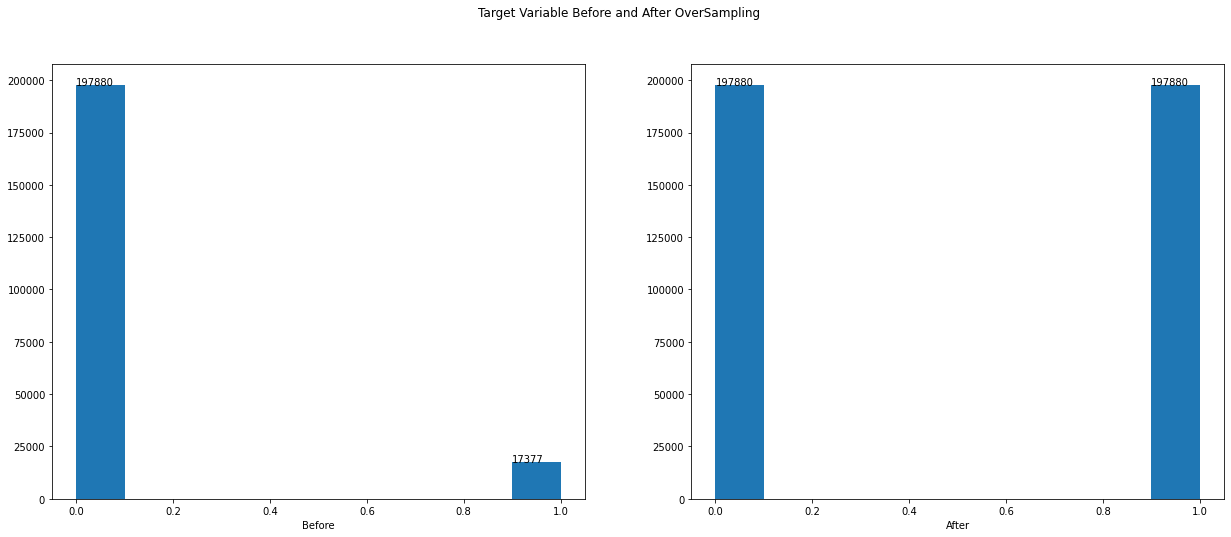

In [34]:
fig, axs = plt.subplots(1,2,figsize=(21,8))
fig.suptitle("Target Variable Before and After OverSampling")
counts, _, patches = axs[0].hist(Y_train)
for count, patch in zip(counts,patches):
    if count > 0:
      axs[0].annotate(str(int(count)), xy=(patch.get_x(), patch.get_height()))
axs[0].set_xlabel("Before")

counts, _, patches = axs[1].hist(Y_train_over)
for count, patch in zip(counts,patches):
    if count > 0:
      axs[1].annotate(str(int(count)), xy=(patch.get_x(), patch.get_height()))
axs[1].set_xlabel("After")

We can see now the distribution of 0 and 1 in TARGET is now equal, let's see how it affects the performance of our models.

In [37]:
sampled = model_lot(X_train_over, X_test, Y_train_over, Y_test)
sampled

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
2,DecisionTreeClassifier,1.000000,0.852429,0.123565,0.135875,0.129428
1,LogisticRegression,0.574100,0.606933,0.109461,0.542159,0.182146
0,DummyClassifier,0.500119,0.497030,0.079350,0.493287,0.136710
3,GaussianNB,0.500003,0.897143,0.071038,0.022691,0.034395


In [39]:
initial

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
2,DecisionTreeClassifier,1.000000,0.849871,0.126226,0.145140,0.135024
0,DummyClassifier,0.852502,0.850348,0.081931,0.083647,0.082780
3,GaussianNB,0.912834,0.912676,0.052941,0.004834,0.008858
1,LogisticRegression,0.919259,0.919266,0.000000,0.000000,0.000000


Compared to the initial sets of models, we observe an increase in accuracy, and more importantly, the Precision, Recall and F-measure score also improved. We will now use more complex models to enhance our result.

# More Complex models


In [41]:
def model_complex(model_list):
  collection = model_list
  comparison = pd.DataFrame([])
  row_index = 0
  for model in collection:
    predicted = model.predict(X_test)
    comparison.loc[row_index,'Model Name'] = model.__class__.__name__
    comparison.loc[row_index, 'Train Accuracy'] = accuracy_score(Y_train,model.predict(X_train))
    comparison.loc[row_index, 'Test Accuracy'] = accuracy_score(Y_test,predicted)
    comparison.loc[row_index, 'Precision'] = precision_score(Y_test, predicted)
    comparison.loc[row_index, 'Recall'] = recall_score(Y_test, predicted)
    comparison.loc[row_index, 'F1 score'] = f1_score(Y_test, predicted)
    row_index += 1
  return comparison.sort_values(by="Precision",ascending=False)

RandomForest

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train_over, Y_train_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Voting

In [ ]:
rfClf = RandomForestClassifier() 
treeClf = DecisionTreeClassifier()
logClf = LogisticRegression()
voting = VotingClassifier(estimators = [('rf',rfClf),('log', logClf),('tree',treeClf)], voting='soft') 
voting.fit(X_train_over, Y_train_over)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [ ]:
model_complex([rf,voting])

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
0,RandomForestClassifier,1.0,0.919125,0.432990,0.005639,0.011133
1,VotingClassifier,1.0,0.864483,0.144585,0.138024,0.141228


As we can see from the results, RandomForestClassifier has the highest accuracy and precision score out of all the models we have employed, which makes sense since we are facing a classfication problem here and RandomForest is best suited for such situations. Now we will need to tune the hyperparameters to attain the best result.

# Hyperparameter Tuning

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num=10)]
max_features = ["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(start = 10, stop = 50, num=9)]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]
ccp_alpha = [x for x in np.arange(start = 0, stop = 0.03, step=0.005)]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               "ccp_alpha":ccp_alpha}
random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0, 0.005, 0.01, 0.015, 0.02, 0.025],
 'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [ ]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
rf_new = RandomForestClassifier()
random = RandomizedSearchCV(estimator=rf_new,
                            param_distributions=random_grid,
                            n_iter=5,
                            cv=3,
                            random_state=2020,
                            verbose=2,
                            n_jobs=-1,
                            scoring="precision")
random.fit(X_train_over,Y_train_over)

The traditional method of hyperparameter tuning proved to be extremely slow due to the large size of our training dataset (I have been running it for 8 hours and still didn't finish tuning). As a result, we will use Optuna, an open source optimizer to fine tune our model more efficiently.

In [ ]:
!pip install optuna

     |████████████████████████████████| 296kB 8.6MB/s 
     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 174kB 9.9MB/s 
     |████████████████████████████████| 143kB 14.4MB/s 
     |████████████████████████████████| 112kB 17.1MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=c5f74ae00c8c2c1465116b770ff2de8428e03ce7606838a8dde843141a5984e2
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
import optuna
def objective(trial):
  
    n_estimators = trial.suggest_int('n_estimators', 20, 200)
    max_depth = int(trial.suggest_float('max_depth', 10, 50, log=True))
    
    clf = RandomForestClassifier(n_estimators=n_estimators, 
                                 max_depth=max_depth)
    predicted = clf.fit(X_train_over, Y_train_over).predict(X_test)
    
    return recall_score(Y_test, predicted)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

trial = study.best_trial

print('Recall: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-05-04 17:26:36,711] A new study created in memory with name: no-name-09fb0d2a-eede-4a14-be66-b4d81fa9ba8d
[I 2021-05-04 17:27:35,841] Trial 0 finished with value: 0.5087271750805585 and parameters: {'n_estimators': 30, 'max_depth': 14.047772461146987}. Best is trial 0 with value: 0.5087271750805585.
[I 2021-05-04 17:33:53,717] Trial 1 finished with value: 0.4744897959183674 and parameters: {'n_estimators': 194, 'max_depth': 15.139339215708894}. Best is trial 0 with value: 0.5087271750805585.
[I 2021-05-04 17:35:20,239] Trial 2 finished with value: 0.15682062298603652 and parameters: {'n_estimators': 61, 'max_depth': 24.97717490750568}. Best is trial 0 with value: 0.5087271750805585.
[I 2021-05-04 17:37:28,751] Trial 3 finished with value: 0.18877551020408162 and parameters: {'n_estimators': 91, 'max_depth': 23.870227882124457}. Best is trial 0 with value: 0.5087271750805585.
[I 2021-05-04 17:41:43,655] Trial 4 finished with value: 0.005773361976369495 and parameters: {'n_estima

Precision: 0.5866004296455424
Best hyperparameters: {'n_estimators': 158, 'max_depth': 11.207186966546672}


In [42]:
rf_optimized = RandomForestClassifier(n_estimators=158, max_depth=11.207186966546672)
rf_optimized.fit(X_train_over,Y_train_over)



In [66]:
finalResult = model_complex([rf_optimized,rf])
finalResult

,Model Name,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
1,RandomForestClassifier,1.000000,0.919071,0.423729,0.006713,0.013217
0,RandomForestClassifier,0.724213,0.704446,0.152267,0.582573,0.241431


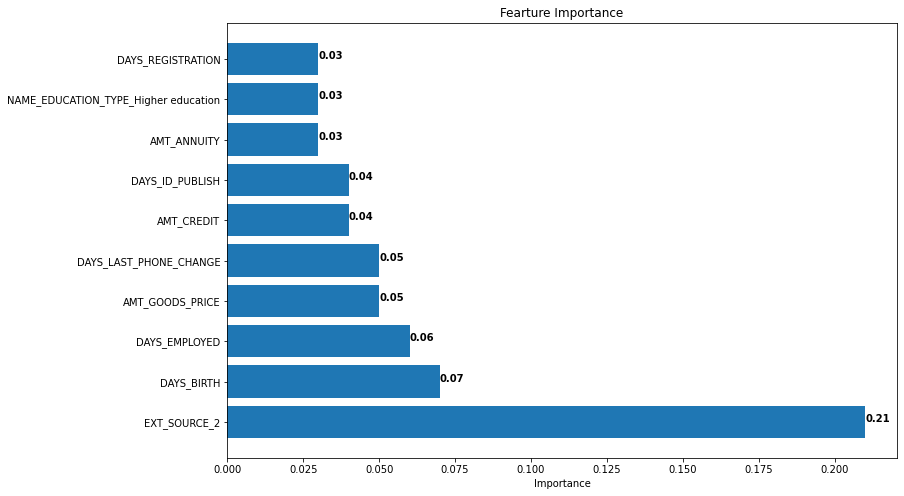

In [76]:
features = pd.DataFrame({"Feature":X_test.columns, "Importance":rf_optimized.feature_importances_}).set_index("Feature").sort_values(by="Importance",ascending=False).head(10)
fig, ax = plt.subplots(figsize = (12,8))
features["Importance"] = round(features["Importance"],2)
width = 0.75 
ax.barh(width=round(features["Importance"],2),y=features.index)
plt.title("Fearture Importance")
plt.xlabel("Importance")
for i, v in enumerate(features["Importance"]):
    ax.text(v, i, str(v), color='black', fontweight='bold')